In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('../datasets/mnist/mnist_train.csv')

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [3]:
Y_train

array([6, 5, 1, ..., 6, 9, 3], dtype=int64)

In [8]:
def init_params():
    W1 = np.random.rand(128, 784) - 0.5
    b1 = np.random.rand(128, 1) - 0.5
    W2 = np.random.rand(10, 128) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [29]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    accuracy = []
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
            accuracy.append(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, accuracy

def gradient_descent_wm(X, Y, alpha, beta, iterations):
    accuracy = []
    W1, b1, W2, b2 = init_params()
    vdW1, vdb1, vdW2, vdb2 = np.zeros(W1.shape), np.zeros(b1.shape), np.zeros(W2.shape), np.zeros(b2.shape)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        
        vdW1 = beta*vdW1 + (1-beta)*dW1
        vdb1 = beta*vdb1 + (1-beta)*db1
        vdW2 = beta*vdW2 + (1-beta)*dW2
        vdb2 = beta*vdb2 + (1-beta)*db2
        
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, vdW1, vdb1, vdW2, vdb2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
            accuracy.append(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, accuracy

In [32]:
W1, b1, W2, b2, acc1 = gradient_descent_wm(X_train, Y_train, 0.1, 0.9, 500)

Iteration:  0
[5 9 5 ... 9 5 9] [6 5 1 ... 6 9 3]
0.08445762711864407
[5 9 5 ... 9 5 9] [6 5 1 ... 6 9 3]
Iteration:  10
[6 7 3 ... 6 3 2] [6 5 1 ... 6 9 3]
0.27471186440677964
[6 7 3 ... 6 3 2] [6 5 1 ... 6 9 3]
Iteration:  20
[6 0 1 ... 6 8 2] [6 5 1 ... 6 9 3]
0.5478983050847458
[6 0 1 ... 6 8 2] [6 5 1 ... 6 9 3]
Iteration:  30
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
0.6432033898305085
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
Iteration:  40
[6 0 1 ... 6 7 2] [6 5 1 ... 6 9 3]
0.7127118644067797
[6 0 1 ... 6 7 2] [6 5 1 ... 6 9 3]
Iteration:  50
[6 0 1 ... 6 7 2] [6 5 1 ... 6 9 3]
0.7449152542372881
[6 0 1 ... 6 7 2] [6 5 1 ... 6 9 3]
Iteration:  60
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
0.7692881355932203
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
Iteration:  70
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
0.7852203389830509
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
Iteration:  80
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
0.7975084745762712
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
Iteration:  90
[6 5 1 ... 6 9 2] [6 5 1 ... 6

In [33]:
W12, b12, W22, b22, acc2 = gradient_descent(X_train, Y_train, 0.1, 500)

Iteration:  0
[2 4 7 ... 2 7 7] [6 5 1 ... 6 9 3]
0.11693220338983051
[2 4 7 ... 2 7 7] [6 5 1 ... 6 9 3]
Iteration:  10
[6 5 0 ... 6 9 8] [6 5 1 ... 6 9 3]
0.4618983050847458
[6 5 0 ... 6 9 8] [6 5 1 ... 6 9 3]
Iteration:  20
[6 5 0 ... 6 9 8] [6 5 1 ... 6 9 3]
0.590457627118644
[6 5 0 ... 6 9 8] [6 5 1 ... 6 9 3]
Iteration:  30
[6 5 0 ... 6 9 2] [6 5 1 ... 6 9 3]
0.6536610169491526
[6 5 0 ... 6 9 2] [6 5 1 ... 6 9 3]
Iteration:  40
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
0.693864406779661
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
Iteration:  50
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
0.7245084745762712
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
Iteration:  60
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
0.748406779661017
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
Iteration:  70
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
0.7676271186440679
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
Iteration:  80
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
0.7833050847457627
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3]
Iteration:  90
[6 5 1 ... 6 9 2] [6 5 1 ... 6 9 3

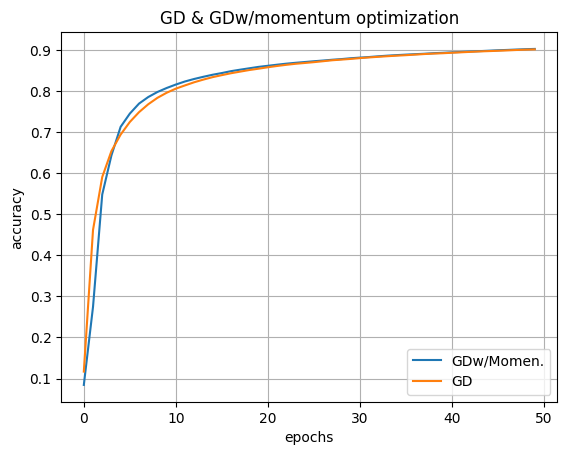

In [37]:
plt.grid(True)
plt.plot(range(50), acc1)
plt.plot(range(50), acc2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('GD & GDw/momentum optimization')
plt.legend(['GDw/Momen.', 'GD'])

~85% accuracy on training set.

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


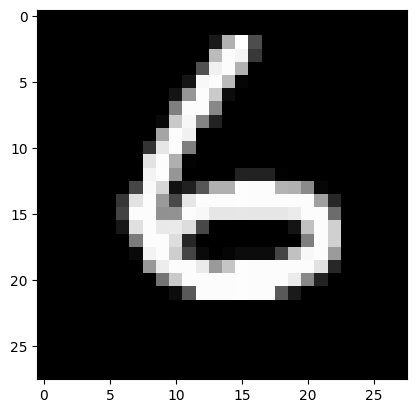

Prediction:  [5]
Label:  5


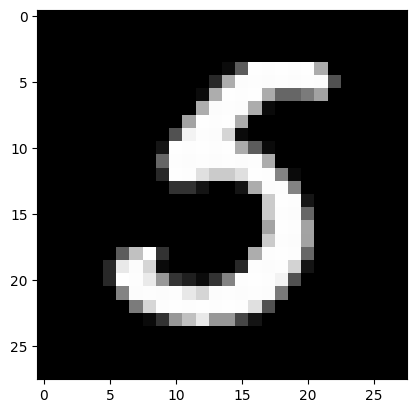

Prediction:  [1]
Label:  1


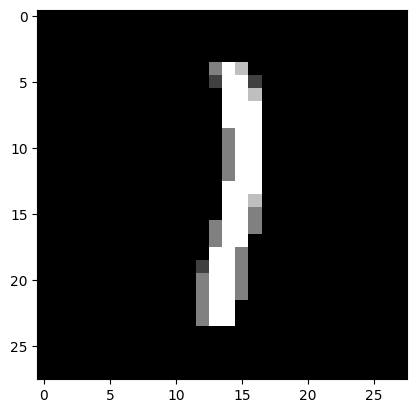

Prediction:  [8]
Label:  8


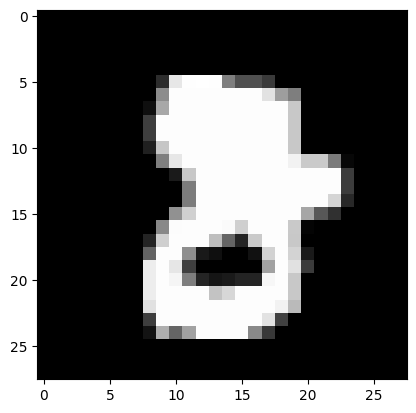

In [39]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)